### Data Dictionary

In this recitation, Iain will be using the dataset boston.csv to predict housing prices in Boston. Please download this 
dataset to follow along in this recitation. This data comes from the UCI Machine Learning Repository.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from xgboost import to_graphviz, plot_importance

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import _hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor, HistGradientBoostingRegressor

%matplotlib inline
sns.set_style('dark')
sns.set(font_scale=1.5)

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score
from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score

import keras
from keras.models import save_model, Sequential
from keras.layers import Activation, BatchNormalization, Dense
from keras.optimizers import Adam

import feature_engine.missing_data_imputers as mdi
from feature_engine.outlier_removers import Winsorizer

from tpot import TPOTClassifier, TPOTRegressor

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns= None
#pd.options.display.max_rows = None

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

### Data Exploration

In [2]:
df = pd.read_csv("boston.csv")

In [3]:
df

,TOWN,TRACT,LON,LAT,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO
0,Nahant,2011,-70.9550,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3
1,Swampscott,2021,-70.9500,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8
2,Swampscott,2022,-70.9360,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8
3,Marblehead,2031,-70.9280,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7
4,Marblehead,2032,-70.9220,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,Winthrop,1801,-70.9860,42.2312,22.4,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0
502,Winthrop,1802,-70.9910,42.2275,20.6,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0
503,Winthrop,1803,-70.9948,42.2260,23.9,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0
504,Winthrop,1804,-70.9875,42.2240,22.0,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TOWN     506 non-null    object 
 1   TRACT    506 non-null    int64  
 2   LON      506 non-null    float64
 3   LAT      506 non-null    float64
 4   MEDV     506 non-null    float64
 5   CRIM     506 non-null    float64
 6   ZN       506 non-null    float64
 7   INDUS    506 non-null    float64
 8   CHAS     506 non-null    int64  
 9   NOX      506 non-null    float64
 10  RM       506 non-null    float64
 11  AGE      506 non-null    float64
 12  DIS      506 non-null    float64
 13  RAD      506 non-null    int64  
 14  TAX      506 non-null    int64  
 15  PTRATIO  506 non-null    float64
dtypes: float64(11), int64(4), object(1)
memory usage: 63.4+ KB


In [5]:
df.describe(include='all')

,TOWN,TRACT,LON,LAT,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO
count,506,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
unique,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Cambridge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2700.355731,-71.056389,42.216440,22.528854,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534
std,NaN,1380.036830,0.075405,0.061777,9.182176,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946
min,NaN,1.000000,-71.289500,42.030000,5.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000
25%,NaN,1303.250000,-71.093225,42.180775,17.025000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000
50%,NaN,3393.500000,-71.052900,42.218100,21.200000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000
75%,NaN,3739.750000,-71.019625,42.252250,25.000000,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000


In [6]:
df.shape

(506, 16)

In [7]:
df.columns

Index(['TOWN', 'TRACT', 'LON', 'LAT', 'MEDV', 'CRIM', 'ZN', 'INDUS', 'CHAS',
       'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO'],
      dtype='object')

### Data Visualization

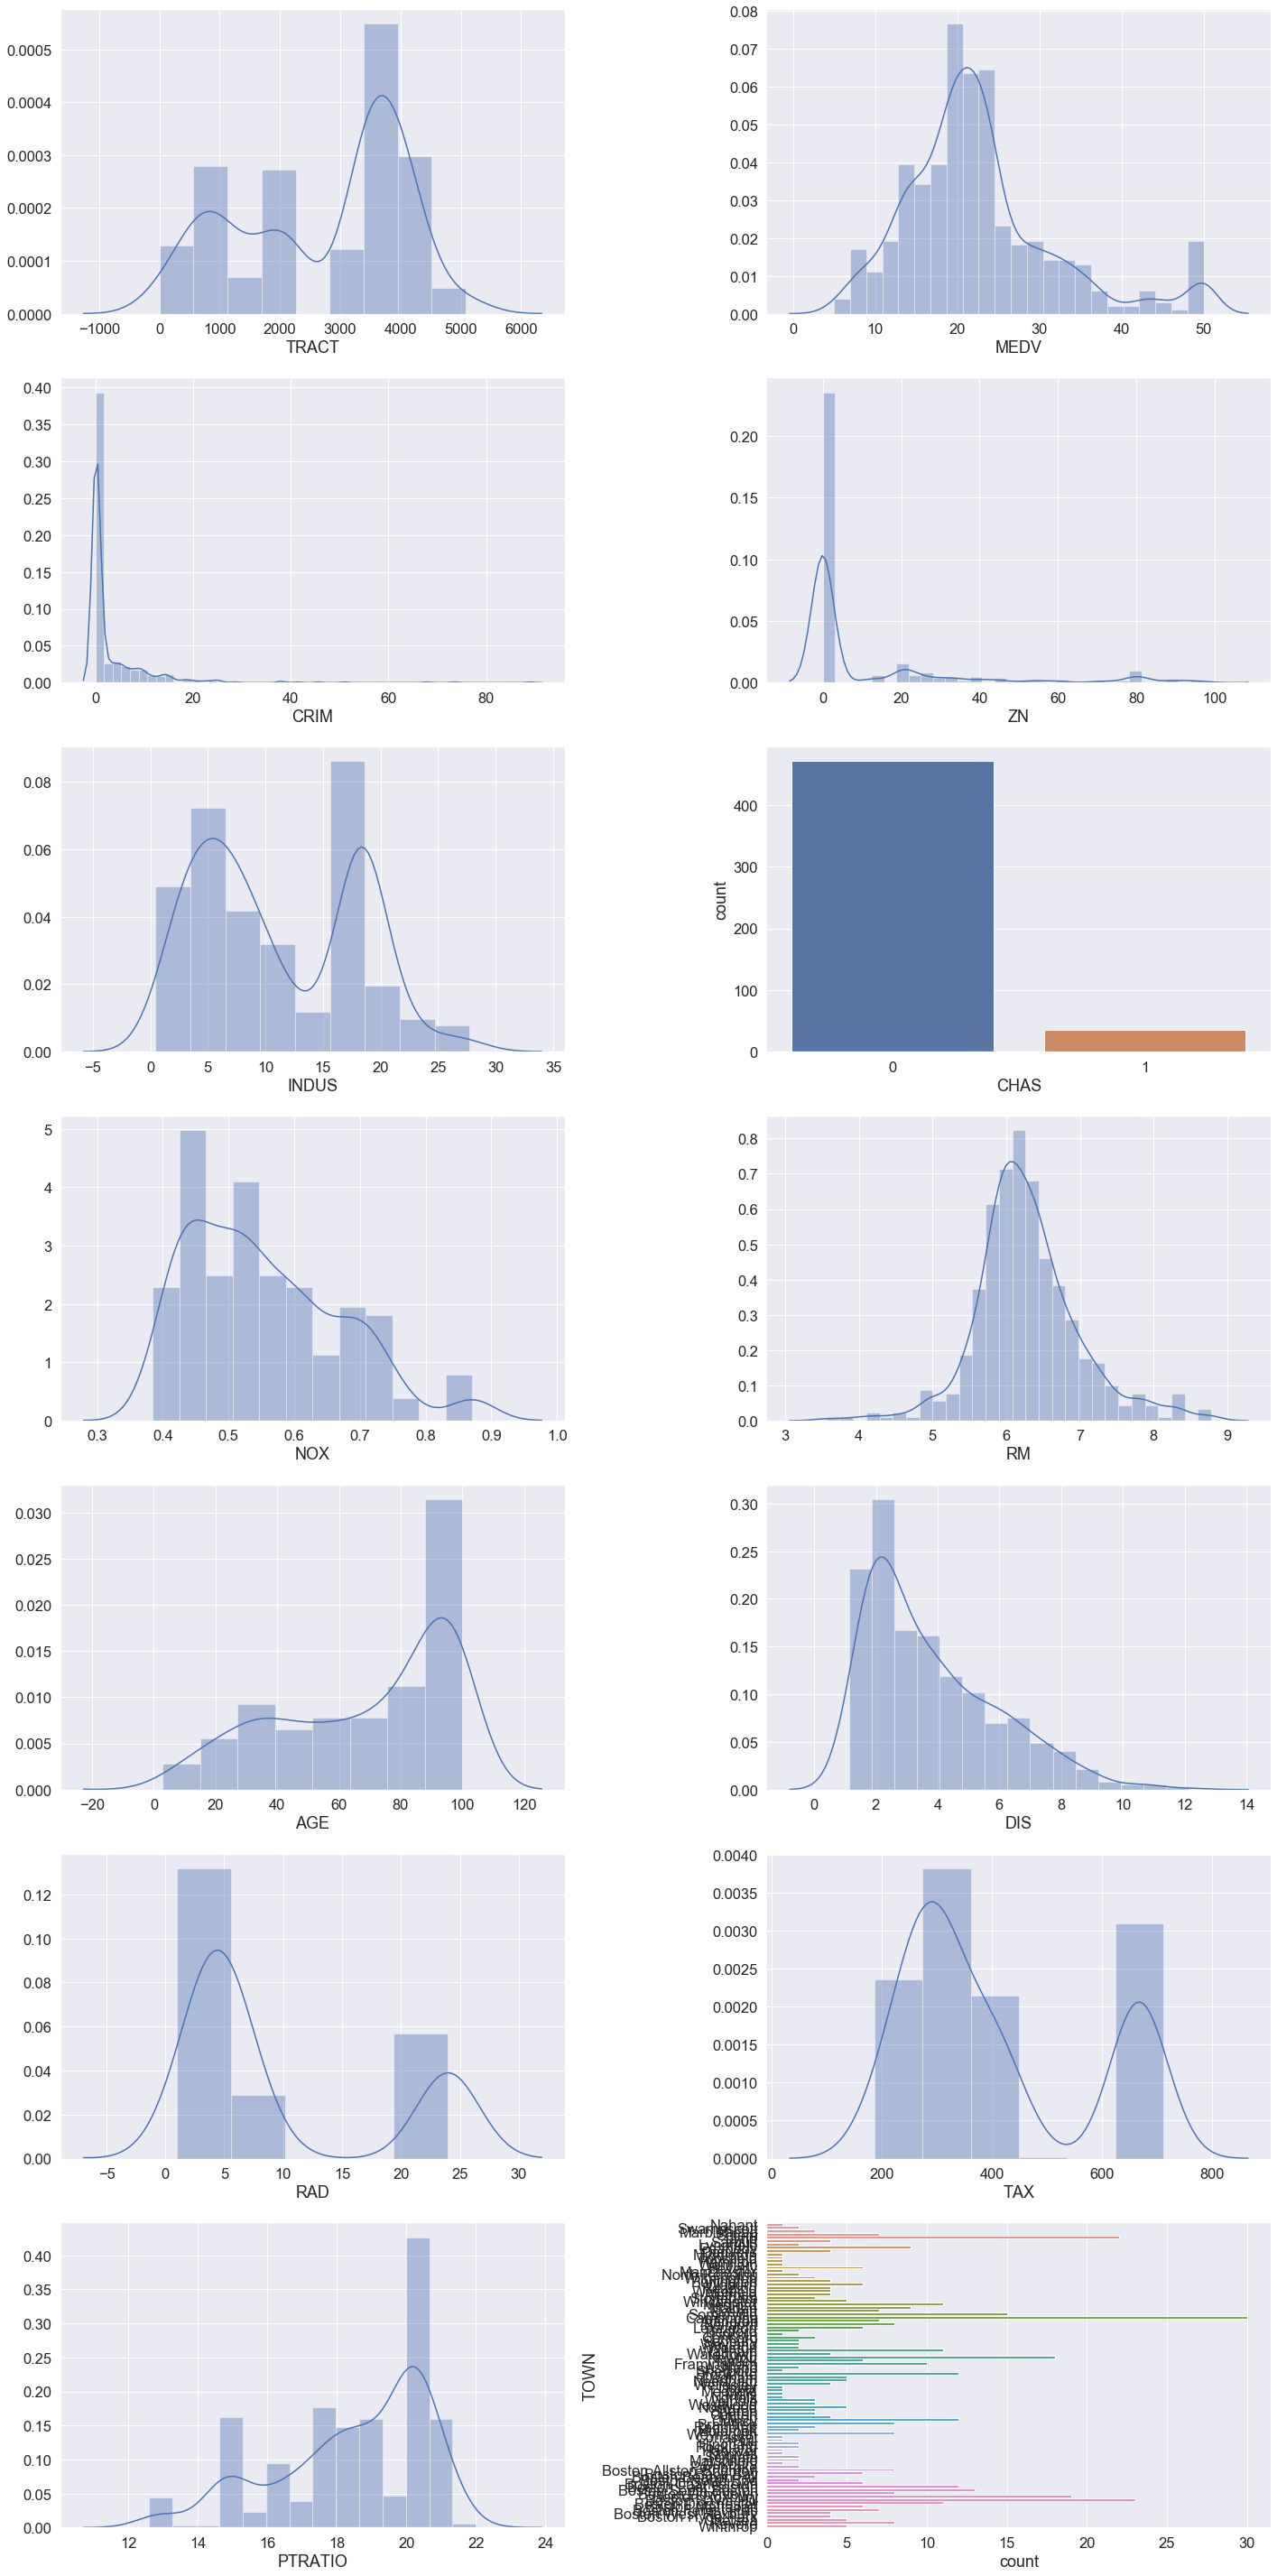

In [8]:
fig = plt.figure(figsize=(20,40))

plt.subplot(7,2,1)
sns.distplot(df.TRACT)
plt.subplot(7,2,2)
sns.distplot(df.MEDV)
plt.subplot(7,2,3)
sns.distplot(df.CRIM)
plt.subplot(7,2,4)
sns.distplot(df.ZN)
plt.subplot(7,2,5)
sns.distplot(df.INDUS)
plt.subplot(7,2,6)
sns.countplot(df.CHAS)
plt.subplot(7,2,7)
sns.distplot(df.NOX)
plt.subplot(7,2,8)
sns.distplot(df.RM)
plt.subplot(7,2,9)
sns.distplot(df.AGE)
plt.subplot(7,2,10)
sns.distplot(df.DIS)
plt.subplot(7,2,11)
sns.distplot(df.RAD)
plt.subplot(7,2,12)
sns.distplot(df.TAX)
plt.subplot(7,2,13)
sns.distplot(df.PTRATIO)
plt.subplot(7,2,14)
sns.countplot(y=df.TOWN)

plt.tight_layout()
plt.show()

In [9]:
df.corr()

,TRACT,LON,LAT,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO
TRACT,1.000000,-0.220890,-0.225543,0.428252,-0.547165,0.367292,-0.575705,0.041356,-0.569807,0.305207,-0.487465,0.496841,-0.828829,-0.793602,-0.532678
LON,-0.220890,1.000000,0.143054,-0.322947,0.065101,-0.218081,0.062702,-0.175619,0.160871,-0.257110,0.204739,-0.011243,0.034067,0.050663,0.312602
LAT,-0.225543,0.143054,1.000000,0.006826,-0.084293,-0.129667,-0.041093,-0.044726,-0.068600,-0.069317,0.079035,-0.082981,-0.207013,-0.167718,-0.004527
MEDV,0.428252,-0.322947,0.006826,1.000000,-0.389582,0.360386,-0.484754,0.175663,-0.429300,0.696304,-0.377999,0.249315,-0.384766,-0.471979,-0.505655
CRIM,-0.547165,0.065101,-0.084293,-0.389582,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946
ZN,0.367292,-0.218081,-0.129667,0.360386,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679
INDUS,-0.575705,0.062702,-0.041093,-0.484754,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248
CHAS,0.041356,-0.175619,-0.044726,0.175663,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515
NOX,-0.569807,0.160871,-0.068600,-0.429300,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933
RM,0.305207,-0.257110,-0.069317,0.696304,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501


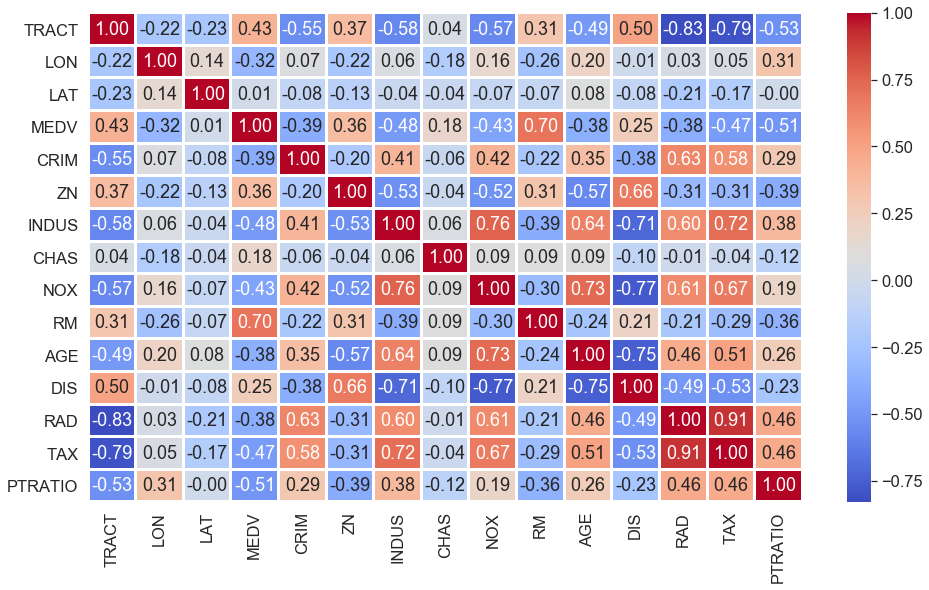

In [10]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.show()

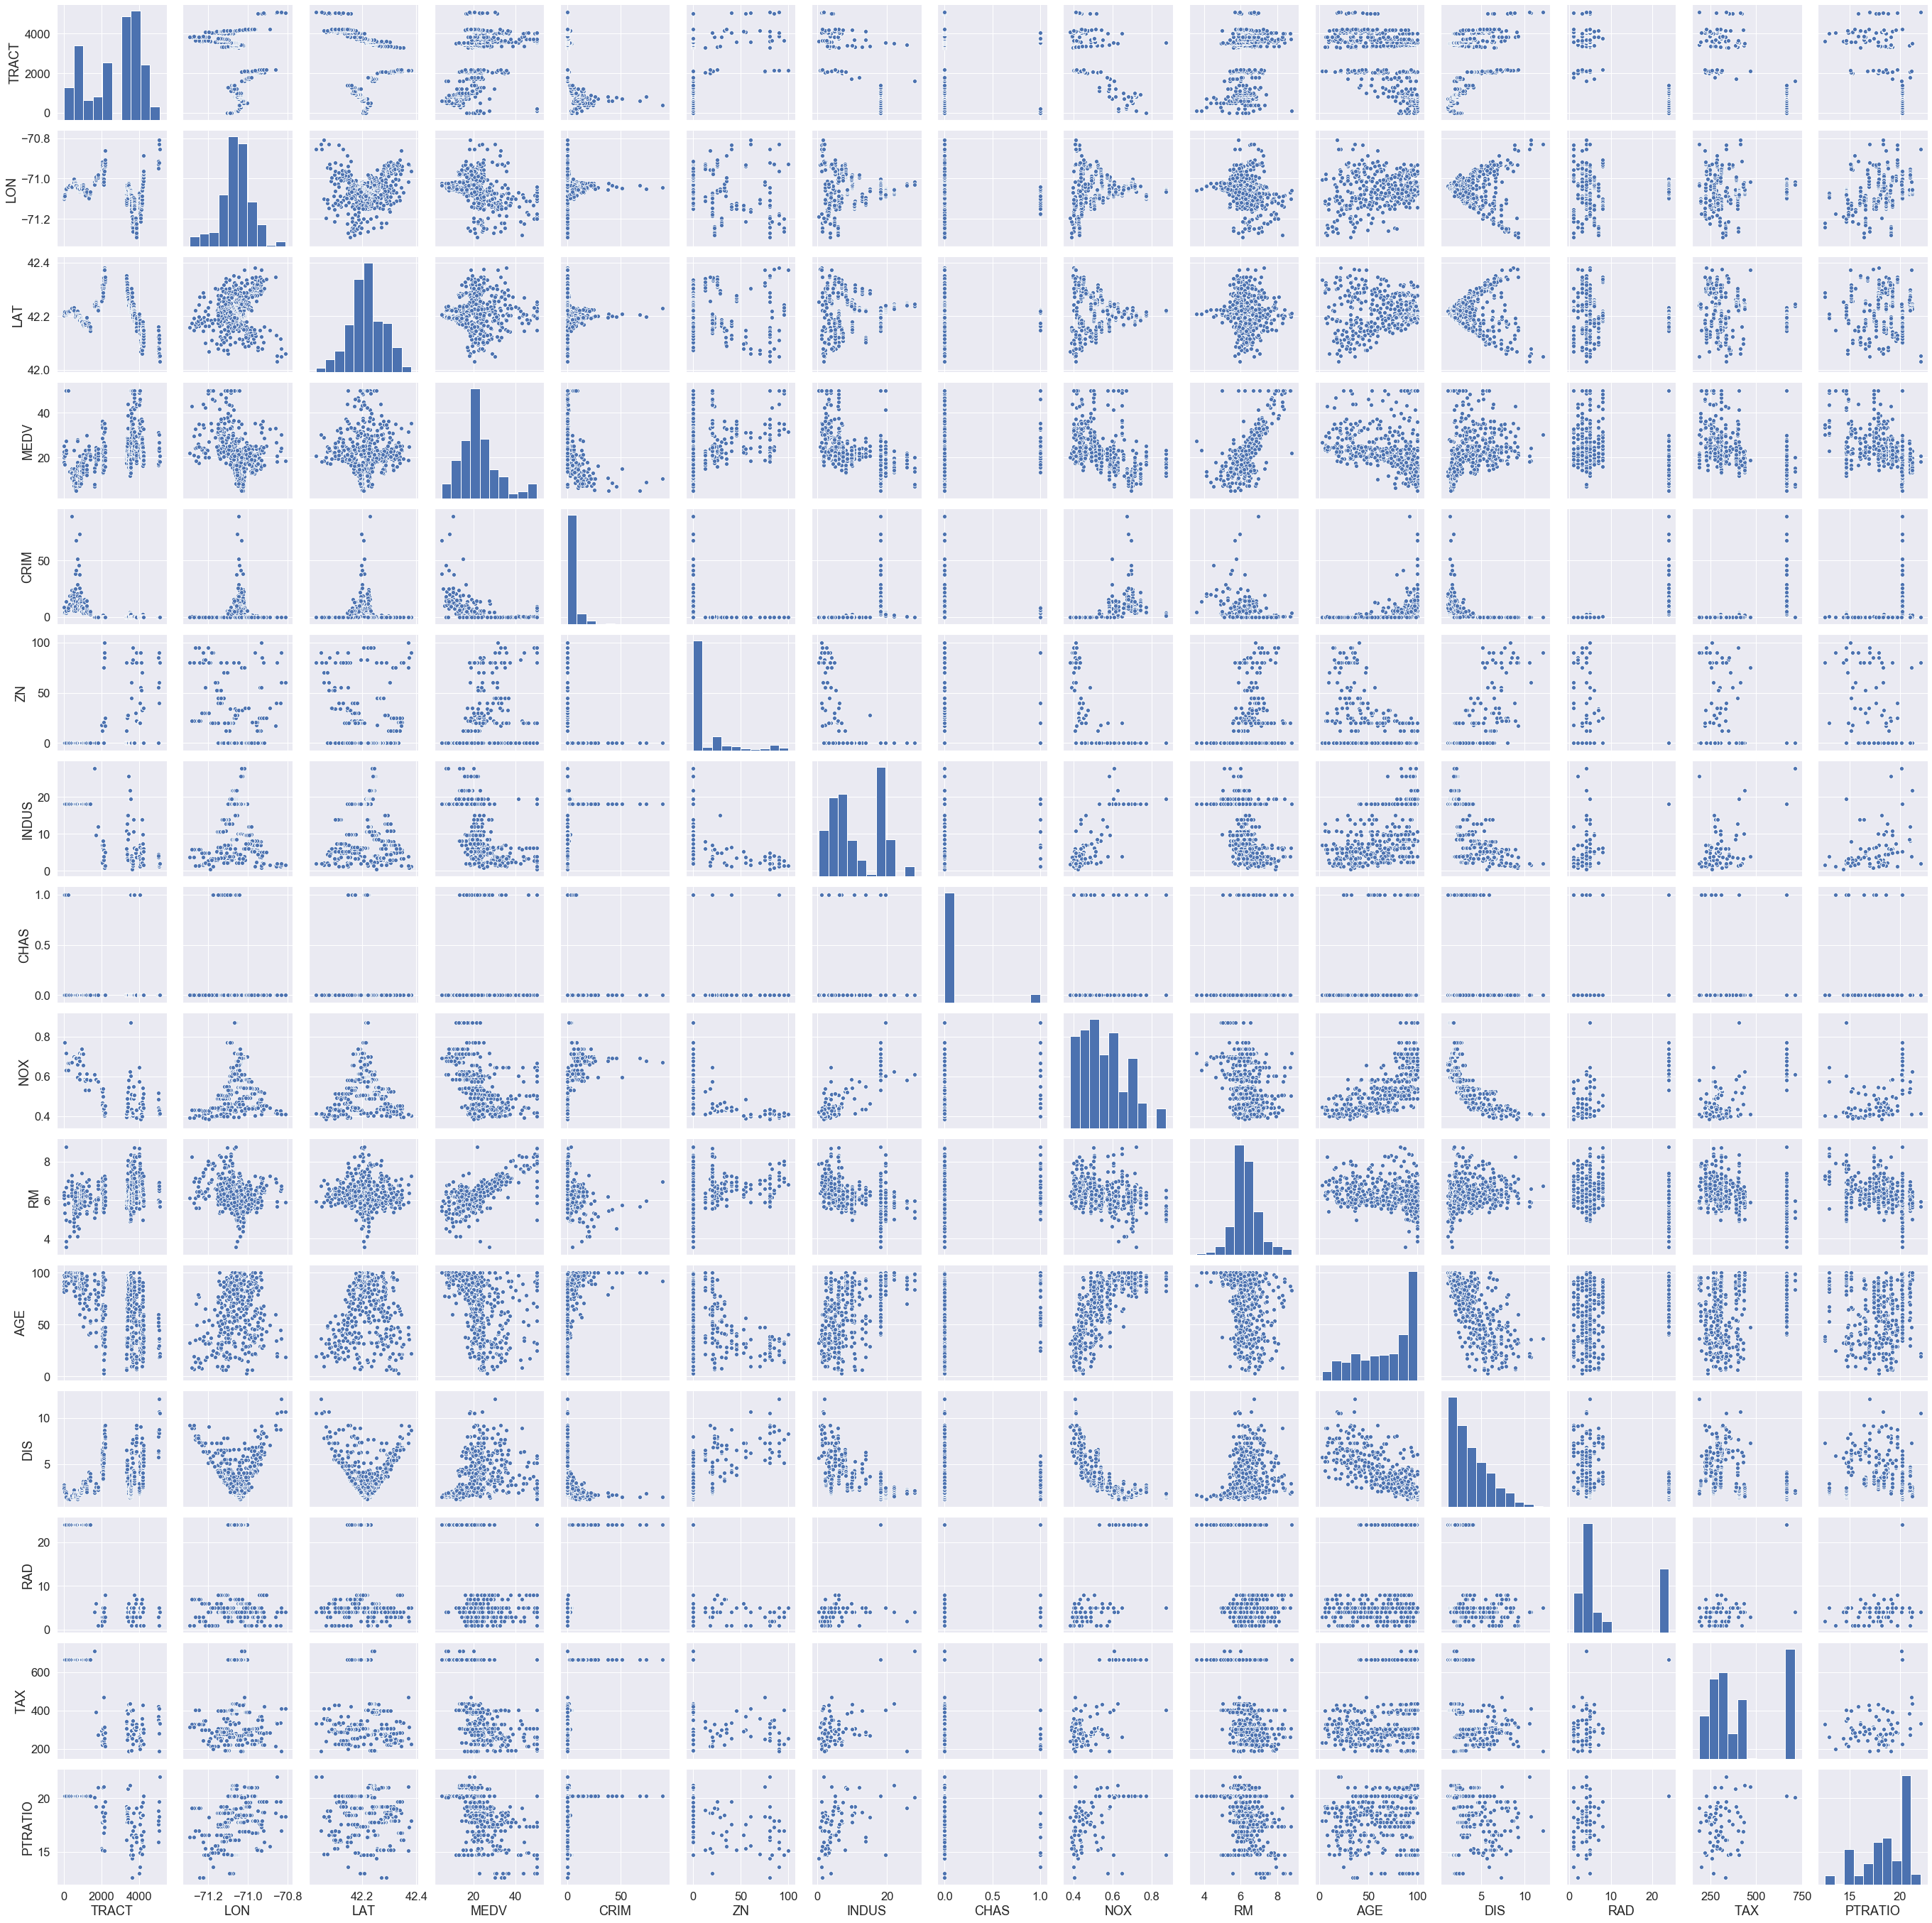

In [11]:
sns.pairplot(df)
plt.show()

### Data Preprocessing

### Treat Missing Values

In [12]:
df.isnull().sum()

TOWN       0
TRACT      0
LON        0
LAT        0
MEDV       0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
dtype: int64

### Treat Duplicate Values

In [13]:
df.duplicated(keep='first').sum()

0

### Treat Imbalance Data

### Treat Outliers

In [14]:
df.columns

Index(['TOWN', 'TRACT', 'LON', 'LAT', 'MEDV', 'CRIM', 'ZN', 'INDUS', 'CHAS',
       'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO'],
      dtype='object')

In [15]:
df.describe()

,TRACT,LON,LAT,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,2700.355731,-71.056389,42.216440,22.528854,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534
std,1380.036830,0.075405,0.061777,9.182176,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946
min,1.000000,-71.289500,42.030000,5.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000
25%,1303.250000,-71.093225,42.180775,17.025000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000
50%,3393.500000,-71.052900,42.218100,21.200000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000
75%,3739.750000,-71.019625,42.252250,25.000000,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000
max,5082.000000,-70.810000,42.381000,50.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000


### Treat Data Types

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TOWN     506 non-null    object 
 1   TRACT    506 non-null    int64  
 2   LON      506 non-null    float64
 3   LAT      506 non-null    float64
 4   MEDV     506 non-null    float64
 5   CRIM     506 non-null    float64
 6   ZN       506 non-null    float64
 7   INDUS    506 non-null    float64
 8   CHAS     506 non-null    int64  
 9   NOX      506 non-null    float64
 10  RM       506 non-null    float64
 11  AGE      506 non-null    float64
 12  DIS      506 non-null    float64
 13  RAD      506 non-null    int64  
 14  TAX      506 non-null    int64  
 15  PTRATIO  506 non-null    float64
dtypes: float64(11), int64(4), object(1)
memory usage: 63.4+ KB


### Drop unwanted features

In [17]:
df.columns

Index(['TOWN', 'TRACT', 'LON', 'LAT', 'MEDV', 'CRIM', 'ZN', 'INDUS', 'CHAS',
       'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO'],
      dtype='object')

In [18]:
df.drop(['TOWN', 'TRACT', 'LON', 'LAT'],axis=1,inplace=True)

In [19]:
df

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO
0,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3
1,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8
2,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8
3,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7
4,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7
...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0
502,20.6,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0
503,23.9,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0
504,22.0,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0


### Train Test Split

In [20]:
X = df.iloc[:,1:11]
y = df.iloc[:,0]

In [21]:
X.values, y.values

(array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 4.0900e+00, 1.0000e+00,
         2.9600e+02],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 4.9671e+00, 2.0000e+00,
         2.4200e+02],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 4.9671e+00, 2.0000e+00,
         2.4200e+02],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1675e+00, 1.0000e+00,
         2.7300e+02],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.3889e+00, 1.0000e+00,
         2.7300e+02],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.5050e+00, 1.0000e+00,
         2.7300e+02]]),
 array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 22.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.2, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 31.6, 23.3, 19.6, 1

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [23]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 10), (102, 10), (404,), (102,))

### Feature Scaling

In [24]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX
220,0.35809,0.0,6.20,1,0.507,6.951,88.5,2.8617,8,307
71,0.15876,0.0,10.81,0,0.413,5.961,17.5,5.2873,4,305
240,0.11329,30.0,4.93,0,0.428,6.897,54.3,6.3361,6,300
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311
417,25.94060,0.0,18.10,0,0.679,5.304,89.1,1.6475,24,666
...,...,...,...,...,...,...,...,...,...,...
323,0.28392,0.0,7.38,0,0.493,5.708,74.3,4.7211,5,287
192,0.08664,45.0,3.44,0,0.437,7.178,26.3,6.4798,5,398
117,0.15098,0.0,10.01,0,0.547,6.021,82.6,2.7474,6,432
47,0.22927,0.0,6.91,0,0.448,6.030,85.5,5.6894,3,233


In [25]:
minmax = MinMaxScaler()

In [26]:
X_train_scaled = minmax.fit_transform(X_train)

In [27]:
X_train_scaled

array([[0.00395381, 0.        , 0.21041056, ..., 0.15407723, 0.30434783,
        0.22900763],
       [0.00171339, 0.        , 0.37939883, ..., 0.37554669, 0.13043478,
        0.22519084],
       [0.00120232, 0.3       , 0.1638563 , ..., 0.4713074 , 0.2173913 ,
        0.21564885],
       ...,
       [0.00162594, 0.        , 0.35007331, ..., 0.14364106, 0.2173913 ,
        0.46755725],
       [0.0025059 , 0.        , 0.23643695, ..., 0.41226044, 0.08695652,
        0.08778626],
       [0.00149286, 0.        , 0.13159824, ..., 0.12982661, 0.17391304,
        0.20801527]])

In [28]:
X_test_scaled = minmax.transform(X_test)

In [29]:
X_test_scaled

array([[ 6.84726112e-04,  0.00000000e+00,  1.01906158e-01, ...,
         3.68908814e-01,  1.30434783e-01,  4.63740458e-01],
       [ 1.03697791e-01,  0.00000000e+00,  6.46627566e-01, ...,
        -4.65655616e-04,  1.00000000e+00,  9.14122137e-01],
       [ 1.21310718e-03,  0.00000000e+00,  4.92302053e-01, ...,
         1.99875825e-01,  1.73913043e-01,  1.69847328e-01],
       ...,
       [ 1.60728552e-03,  2.50000000e-01,  1.71187683e-01, ...,
         5.52504953e-01,  3.04347826e-01,  1.85114504e-01],
       [ 1.50837564e-03,  0.00000000e+00,  3.71334311e-01, ...,
         2.53024479e-01,  1.30434783e-01,  1.71755725e-01],
       [ 1.36787866e-03,  0.00000000e+00,  2.96920821e-01, ...,
         1.14925632e-01,  1.73913043e-01,  3.75954198e-01]])

### Create and save processed dataset

In [30]:
#df.to_csv("bostontrain.csv",index=False)

### Model Training

### Using XGBoost

In [31]:
xgbmodel = XGBRegressor(random_state=0, n_estimators=100, objective='reg:squarederror')

In [32]:
xgbmodel.fit(X_train_scaled,y_train,eval_set=[(X_test_scaled,y_test)],eval_metric='rmse',early_stopping_rounds=10)

[0]	validation_0-rmse:21.4643
Will train until validation_0-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:19.5829
[2]	validation_0-rmse:17.9071
[3]	validation_0-rmse:16.3572
[4]	validation_0-rmse:15.0198
[5]	validation_0-rmse:13.7953
[6]	validation_0-rmse:12.737
[7]	validation_0-rmse:11.808
[8]	validation_0-rmse:11.006
[9]	validation_0-rmse:10.2818
[10]	validation_0-rmse:9.57268
[11]	validation_0-rmse:9.04744
[12]	validation_0-rmse:8.50865
[13]	validation_0-rmse:8.11174
[14]	validation_0-rmse:7.74193
[15]	validation_0-rmse:7.47614
[16]	validation_0-rmse:7.18143
[17]	validation_0-rmse:6.97709
[18]	validation_0-rmse:6.81633
[19]	validation_0-rmse:6.65633
[20]	validation_0-rmse:6.49409
[21]	validation_0-rmse:6.3549
[22]	validation_0-rmse:6.22046
[23]	validation_0-rmse:6.14187
[24]	validation_0-rmse:6.10781
[25]	validation_0-rmse:6.00681
[26]	validation_0-rmse:5.96521
[27]	validation_0-rmse:5.88848
[28]	validation_0-rmse:5.84541
[29]	validation_0-rmse:5.78713
[30]	validation_0-r

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [33]:
y_pred = xgbmodel.predict(X_test_scaled)

In [34]:
y_pred

array([24.541296 , 32.301876 , 21.96933  ,  9.313588 , 23.42612  ,
       19.936756 , 20.353436 , 20.503164 , 25.53761  , 20.827274 ,
        7.9558544, 19.60096  , 15.891305 ,  9.646675 , 47.62954  ,
       31.941761 , 22.049433 , 33.139595 , 26.477055 , 21.164389 ,
       23.18005  , 19.15511  , 19.81786  , 25.047932 , 20.824324 ,
       15.675157 , 16.410488 , 16.230644 , 44.57513  , 18.141125 ,
       16.118763 , 14.784626 , 20.519747 , 21.793203 , 22.421505 ,
       18.187208 ,  9.309829 , 14.4292   , 16.723742 , 17.758364 ,
       22.89049  , 21.09659  , 23.852306 , 14.968503 , 23.426752 ,
       20.409678 , 20.456005 , 18.191217 , 21.031813 , 25.052847 ,
       19.982397 , 21.938587 , 20.734514 , 41.413498 , 16.713625 ,
       20.790186 , 20.437538 , 19.875284 , 12.198347 , 19.248291 ,
       21.131157 , 21.198814 , 31.322763 , 26.938293 , 16.779564 ,
       26.999636 , 21.065886 , 18.883257 , 20.595976 , 22.604397 ,
       21.683676 , 23.482367 , 23.493961 , 30.029806 , 24.5459

### Model Evaluation

In [35]:
mse = mean_squared_error(y_test,y_pred)
mse

28.611320653921503

In [36]:
rmse = np.sqrt(mse)
rmse

5.348955099262051

In [37]:
r2score = r2_score(y_test,y_pred)
r2score

0.6444966587105863

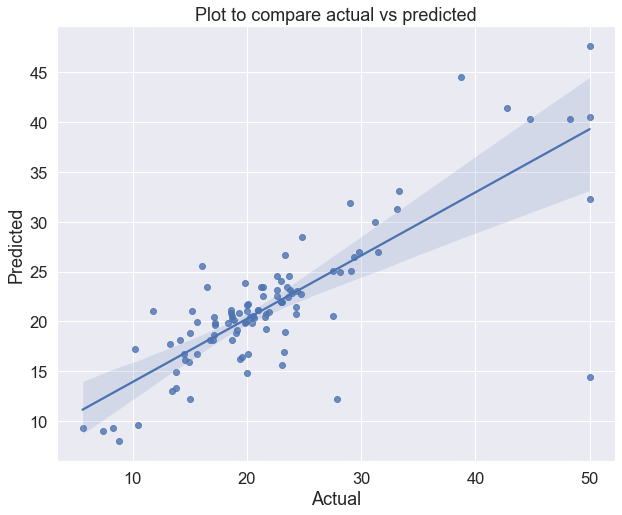

In [38]:
fig, ax = plt.subplots(figsize=(10,8))
sns.regplot(x=y_test, y=y_pred, ax=ax)
plt.title("Plot to compare actual vs predicted")
plt.ylabel("Predicted")
plt.xlabel("Actual")
plt.show()

### Available importance_types = [‘weight’, ‘gain’, ‘cover’, ‘total_gain’, ‘total_cover’]

In [39]:
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX'], dtype='object')

In [40]:
xgbmodel.get_booster().feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX']

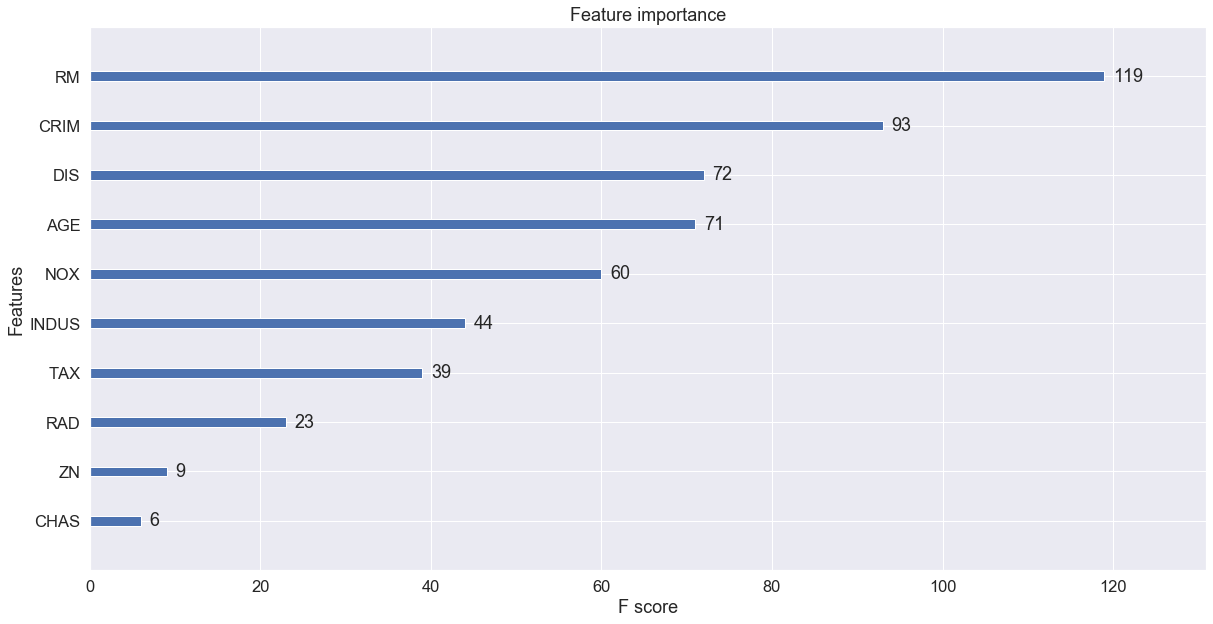

In [41]:
fig, ax = plt.subplots(figsize=(20,10))
xgb.plot_importance(xgbmodel.get_booster(),ax=ax)
plt.show()

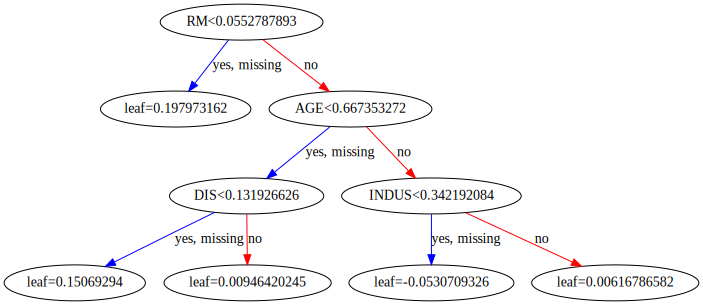

In [42]:
xgb.to_graphviz(xgbmodel,num_trees=80)

### Cross-Validation

In [43]:
cv = cross_val_score(xgbmodel,X,y,cv=5,verbose=1,scoring='neg_mean_squared_error')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished


In [44]:
cv.mean()

-29.091626372739803

In [45]:
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [46]:
model = XGBRegressor(random_state=0, n_estimators=100, objective='reg:squarederror')

In [47]:
parameters = {'max_depth': np.arange(3,10,1),
              'learning rate': np.arange(0.05,0.3,0.03),
              'n_estimators':np.arange(100,1000,100),
              'min_child_weight': np.arange(1,4,1),
              'gamma':np.arange(0,50,2),
              'subsample':np.arange(0.5,0.9,0.1),
              'colsample_bytree':np.arange(0.5,0.9,0.1)
             }

In [48]:
randm = RandomizedSearchCV(estimator=model, param_distributions = parameters, cv = 5, n_iter = 50, 
                           n_jobs=-1, scoring='r2')

In [49]:
randm.fit(X, y)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:squarederror',
                                          random_state=0, reg_...
       34, 36, 38, 40, 42, 44, 46, 48]),
                                        'learning rate': array([0.05, 0.08, 0.11, 0.14, 0.17, 0.2 , 0.23, 0.26, 0.29]),
                           

In [50]:
randm.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=32,
             importance_type='gain', learning rate=0.08, learning_rate=0.1,
             max_delta_step=0, max_depth=7, min_child_weight=1, missing=None,
             n_estimators=400, n_jobs=1, nthread=None,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
             subsample=0.5, verbosity=1)

In [51]:
randm.best_score_

0.4515671660498814

In [52]:
randm.best_params_

{'subsample': 0.5,
 'n_estimators': 400,
 'min_child_weight': 1,
 'max_depth': 7,
 'learning rate': 0.08,
 'gamma': 32,
 'colsample_bytree': 0.7}